# Wind Power Generation Forecasting

#### pip install pandas numpy scikit-learn matplotlib seaborn

In [1]:
# importing all the necessary libraries
import pandas as pd # data manipulation
import numpy as np # numerical python - linear algebra
import matplotlib.pyplot as plt # visualization lib
import seaborn as sns
from sklearn.model_selection import train_test_split # sklearn - ML
from sklearn.preprocessing import StandardScaler # scaling

In [2]:
df = pd.read_csv(r"C:\Users\abhis\Desktop\program\AICTE_Edunet_Internship\Week_1\data\Wind_Power_Normalized.csv")

In [3]:
df

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location,Ordinal_Time,Year,Month,Day,Hour,Minute
0,-0.824797,0.856757,-0.574031,0.077712,0.051240,0.403900,0.450000,0.031359,0.1635,1,736331,2017,1,2,0,0
1,-0.829340,0.914472,-0.564477,0.111171,0.162261,0.417827,0.438889,0.135889,0.1424,1,736331,2017,1,2,1,0
2,-0.902026,1.203045,-0.574031,0.070157,0.113054,0.409471,0.416667,0.094077,0.1214,1,736331,2017,1,2,2,0
3,-0.874768,1.029901,-0.583585,0.070157,0.109394,0.158774,0.291667,0.038328,0.1003,1,736331,2017,1,2,3,0
4,-0.879311,1.029901,-0.593139,0.133297,0.180155,0.158774,0.233333,0.121951,0.0793,1,736331,2017,1,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175195,-0.961082,1.376189,-0.597916,0.216406,0.270842,0.008357,0.022222,0.268293,0.3417,4,738155,2021,12,31,19,0
175196,-0.970168,1.260759,-0.636133,0.253643,0.305815,0.000000,0.013889,0.257840,0.3342,4,738155,2021,12,31,20,0
175197,-0.988339,1.145330,-0.669573,0.248786,0.307849,0.008357,0.022222,0.257840,0.3267,4,738155,2021,12,31,21,0
175198,-0.988339,1.087615,-0.688682,0.248246,0.302562,0.002786,0.016667,0.254355,0.3192,4,738155,2021,12,31,22,0


In [4]:
# To see the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   temperature_2m       175200 non-null  float64
 1   relativehumidity_2m  175200 non-null  float64
 2   dewpoint_2m          175200 non-null  float64
 3   windspeed_10m        175200 non-null  float64
 4   windspeed_100m       175200 non-null  float64
 5   winddirection_10m    175200 non-null  float64
 6   winddirection_100m   175200 non-null  float64
 7   windgusts_10m        175200 non-null  float64
 8   Power                175200 non-null  float64
 9   Location             175200 non-null  int64  
 10  Ordinal_Time         175200 non-null  int64  
 11  Year                 175200 non-null  int64  
 12  Month                175200 non-null  int64  
 13  Day                  175200 non-null  int64  
 14  Hour                 175200 non-null  int64  
 15  Minute           

In [5]:
# To check the statistics of Dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m,175200.0,2.634524e-16,1.000003,-3.536871,-0.747569,0.011085,0.846967,2.500560
relativehumidity_2m,175200.0,3.508913e-16,1.000003,-3.529555,-0.759253,0.106467,0.799042,1.722476
dewpoint_2m,175200.0,-6.943203e-17,1.000003,-3.473746,-0.698236,-0.015107,0.863884,2.015171
windspeed_10m,175200.0,2.243734e-01,0.108617,0.000000,0.141932,0.207771,0.290340,1.000000
windspeed_100m,175200.0,2.797615e-01,0.123789,0.000000,0.191135,0.271655,0.357869,1.000000
winddirection_10m,175200.0,5.587450e-01,0.277546,0.000000,0.359331,0.584958,0.799443,1.000000
winddirection_100m,175200.0,5.598307e-01,0.279677,0.000000,0.358333,0.586111,0.805556,1.000000
windgusts_10m,175200.0,2.626552e-01,0.126045,0.000000,0.167247,0.247387,0.341463,1.000000
Power,175200.0,3.034291e-01,0.257325,0.000000,0.087700,0.233100,0.474200,0.999400
Location,175200.0,2.500000e+00,1.118037,1.000000,1.750000,2.500000,3.250000,4.000000


In [6]:
# Check the missing values
df.isnull().sum()

temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
Location               0
Ordinal_Time           0
Year                   0
Month                  0
Day                    0
Hour                   0
Minute                 0
dtype: int64

In [7]:
# To check the duplicated rows
df.duplicated().sum()

0

In [8]:
# Encode the categorical variables
df = pd.get_dummies(df, columns=['Location'], drop_first=True)
df.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Ordinal_Time,Year,Month,Day,Hour,Minute,Location_2,Location_3,Location_4
0,-0.824797,0.856757,-0.574031,0.077712,0.051240,0.403900,0.450000,0.031359,0.1635,736331,2017,1,2,0,0,False,False,False
1,-0.829340,0.914472,-0.564477,0.111171,0.162261,0.417827,0.438889,0.135889,0.1424,736331,2017,1,2,1,0,False,False,False
2,-0.902026,1.203045,-0.574031,0.070157,0.113054,0.409471,0.416667,0.094077,0.1214,736331,2017,1,2,2,0,False,False,False
3,-0.874768,1.029901,-0.583585,0.070157,0.109394,0.158774,0.291667,0.038328,0.1003,736331,2017,1,2,3,0,False,False,False
4,-0.879311,1.029901,-0.593139,0.133297,0.180155,0.158774,0.233333,0.121951,0.0793,736331,2017,1,2,4,0,False,False,False


In [9]:
df.columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power', 'Ordinal_Time', 'Year', 'Month', 'Day',
       'Hour', 'Minute', 'Location_2', 'Location_3', 'Location_4'],
      dtype='object')

In [10]:
df.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Ordinal_Time,Year,Month,Day,Hour,Minute,Location_2,Location_3,Location_4
0,-0.824797,0.856757,-0.574031,0.077712,0.051240,0.403900,0.450000,0.031359,0.1635,736331,2017,1,2,0,0,False,False,False
1,-0.829340,0.914472,-0.564477,0.111171,0.162261,0.417827,0.438889,0.135889,0.1424,736331,2017,1,2,1,0,False,False,False
2,-0.902026,1.203045,-0.574031,0.070157,0.113054,0.409471,0.416667,0.094077,0.1214,736331,2017,1,2,2,0,False,False,False
3,-0.874768,1.029901,-0.583585,0.070157,0.109394,0.158774,0.291667,0.038328,0.1003,736331,2017,1,2,3,0,False,False,False
4,-0.879311,1.029901,-0.593139,0.133297,0.180155,0.158774,0.233333,0.121951,0.0793,736331,2017,1,2,4,0,False,False,False


In [11]:
# Let's extract the numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power', 'Ordinal_Time', 'Year', 'Month', 'Day',
       'Hour', 'Minute'],
      dtype='object')

In [13]:
df.shape

(175200, 18)

IndexError: index 12 is out of bounds for axis 0 with size 12

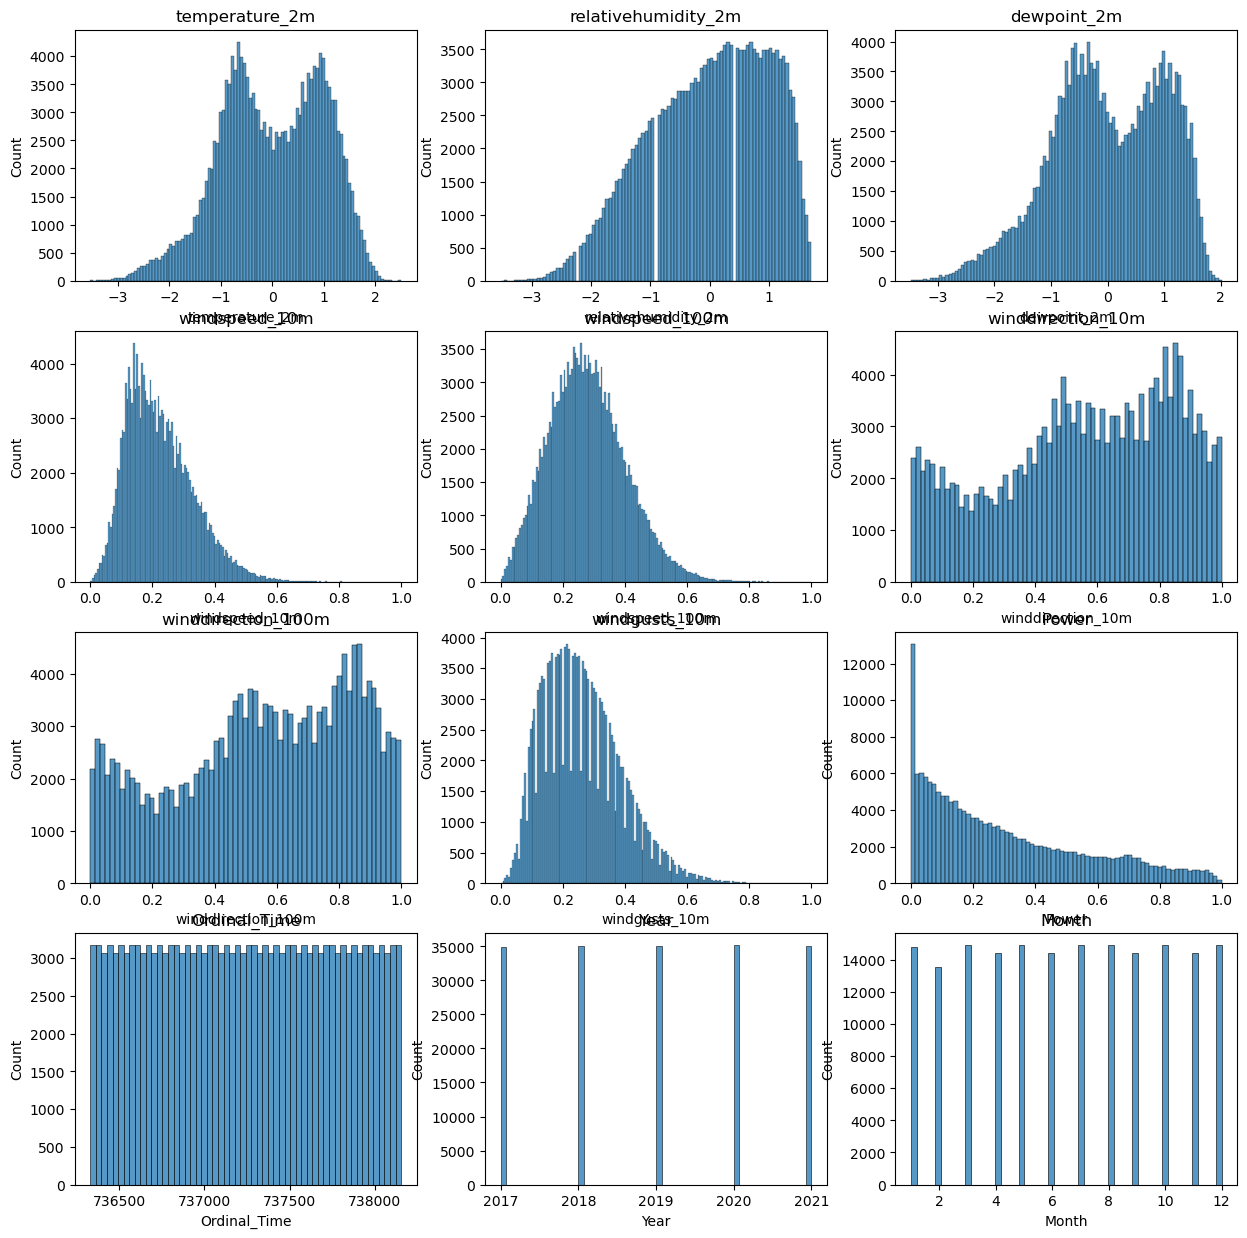

In [14]:
# let's plot using subplots for the data distribution of each numerical cols
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten() # we have 2d array and for that we need indices, rows/cols, so converting into 1d array
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

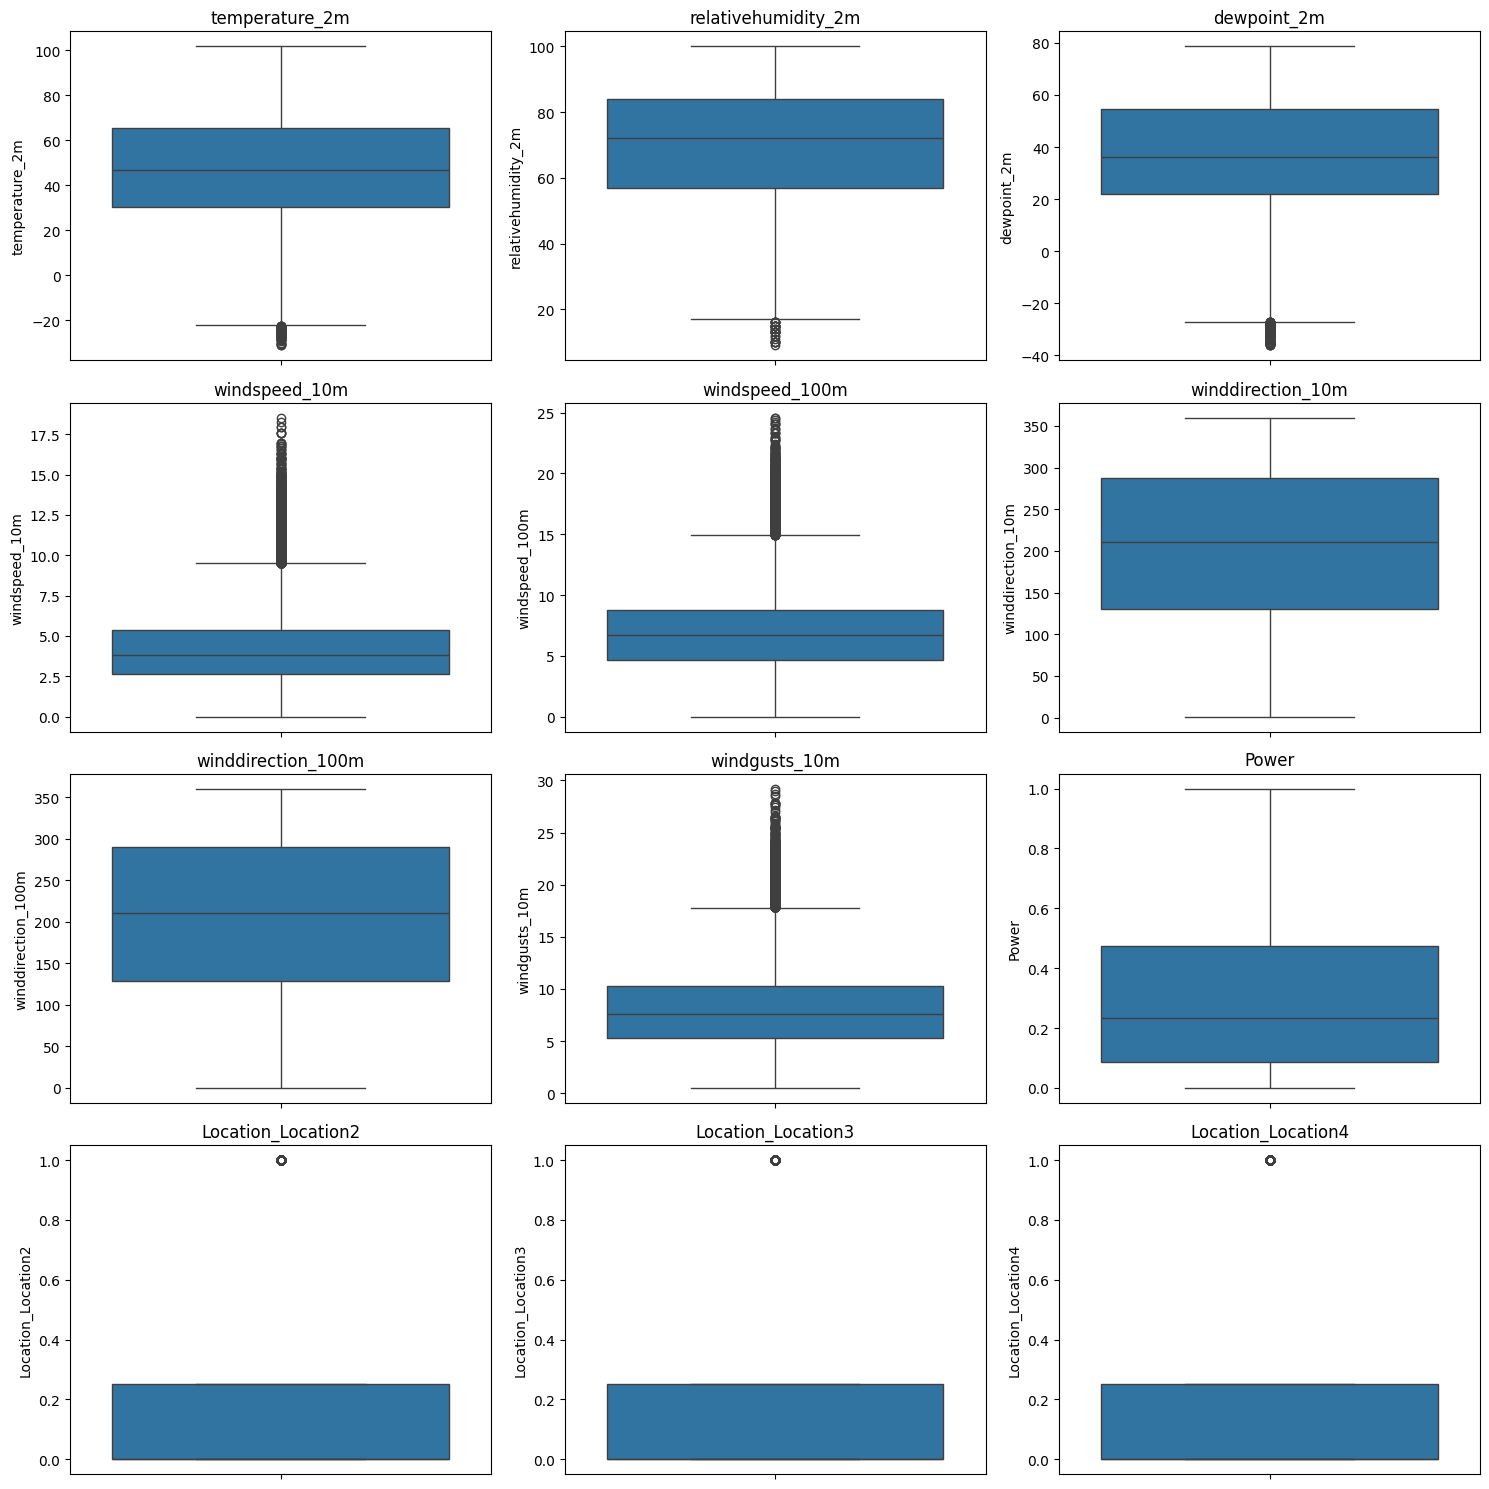

In [17]:
# Let's create box plot
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(merged_data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

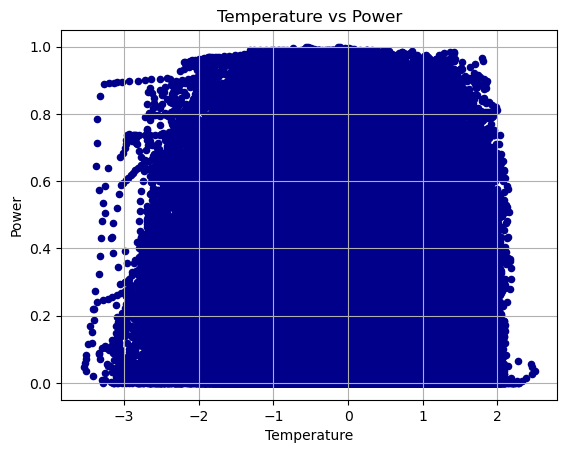

In [15]:
# let's use scatter plot to see the relationship between power & temp
df.plot.scatter(x='temperature_2m', y='Power', c='DarkBlue')
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.title('Temperature vs Power')
plt.grid(True)
plt.show()

IndexError: index 12 is out of bounds for axis 0 with size 12

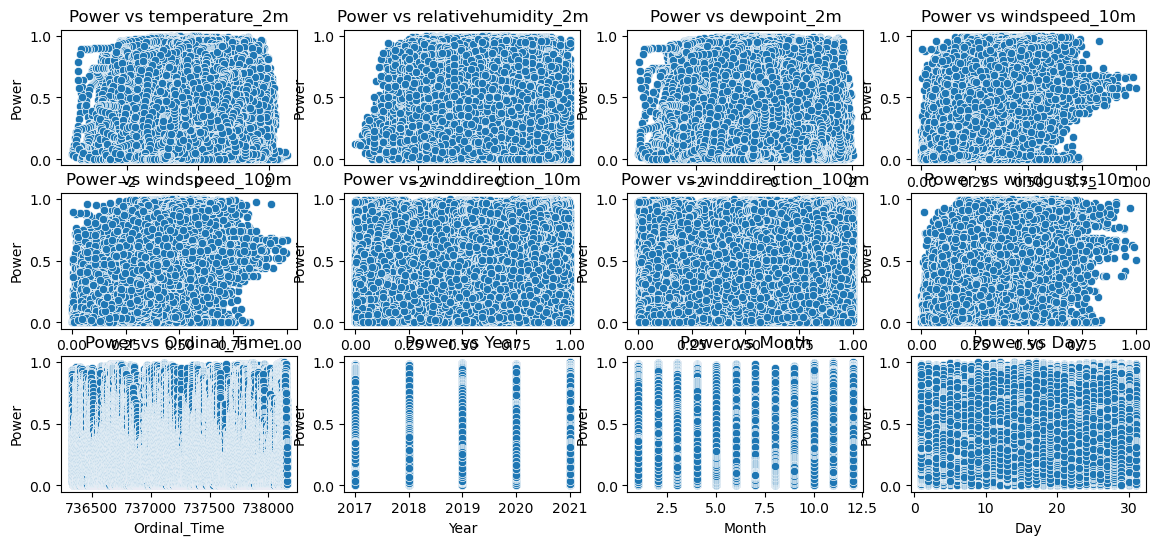

In [16]:
# Creating multiple plots to see the relation btw different cols and power
fig, axes = plt.subplots(3, 4, figsize=(14, 6))
axes = axes.flatten()
for i, col in enumerate(numerical_columns.drop('Power')):
    sns.scatterplot(x=col, y='Power', data=df, ax=axes[i])
    axes[i].set_title(f'Power vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Power')
plt.tight_layout()
plt.show()

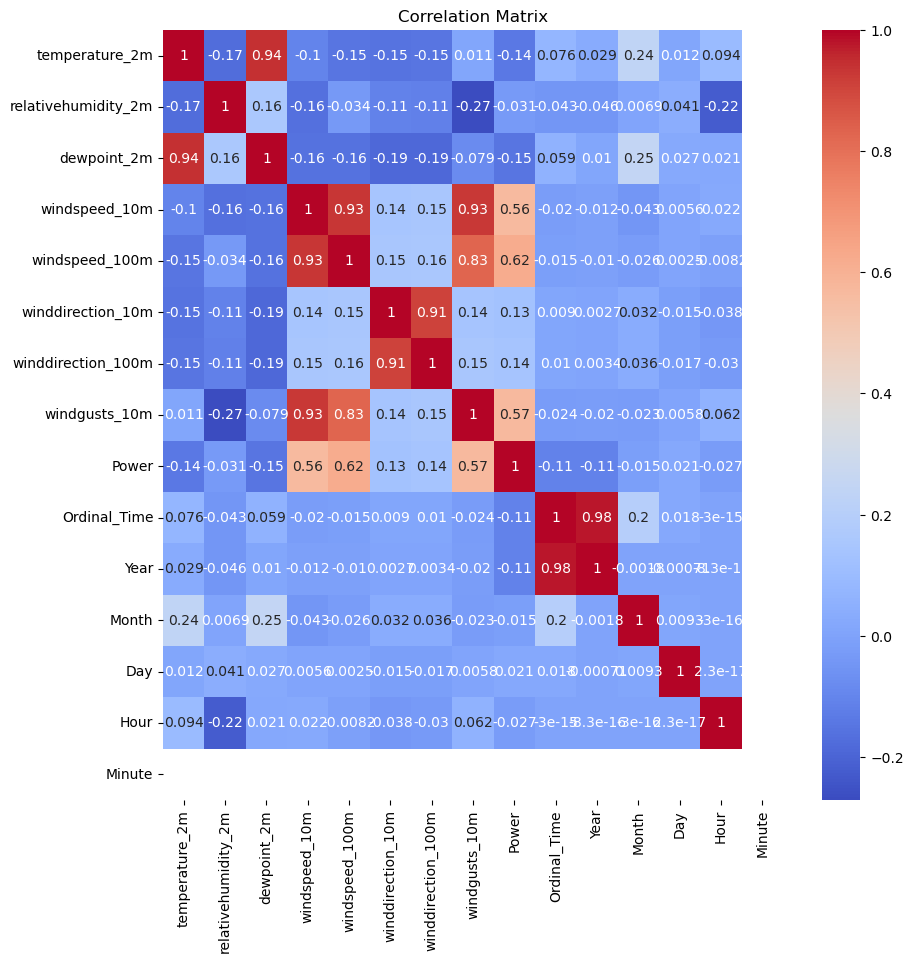

In [17]:
# Check the correlation between the cols and power
correlation = df[numerical_columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Week 3: Data modeling and evaluate

In [18]:
# Feature and target selection
X = df.drop('Power', axis=1) # features
y = df['Power'] # target

In [19]:
# Split the data into training and test sets - 80% & 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Train with Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Make the predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R Squared Score: {r2}')

Mean Absolute Error: 0.13603716019350562
Mean Squared Error: 0.03179058449535424
R Squared Score: 0.5240537251539572


In [23]:
# Train using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the RF Model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# Let's predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'RF MAE: {mae_rf}')
print(f'RF MSE: {mse_rf}')
print(f'RF R2 Score: {r2_rf}')

RF MAE: 0.07310706007420091
RF MSE: 0.011057523390247403
RF R2 Score: 0.8344545358270993


In [25]:
# Train using XGBoost Regressor Model
from xgboost import XGBRegressor
# Initialize the model
xgb_model = XGBRegressor()
# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
# Prediction
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGB MAE: {mae_xgb}')
print(f'XGB MSE: {mse_xgb}')
print(f'XGB R2: {r2_xgb}')

XGB MAE: 0.09134463695795031
XGB MSE: 0.015220417473627137
XGB R2: 0.7721306130991998


In [27]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # Use MAE for evaluation
    cv=3,  # 3-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best MAE: {-grid_search.best_score_}')

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f'Tuned Model Mean Absolute Error (MAE): {mae_tuned}')
print(f'Tuned Model Mean Squared Error (MSE): {mse_tuned}')
print(f'Tuned Model R^2 Score: {r2_tuned}')

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best MAE: 0.08264389570600457
Tuned Model Mean Absolute Error (MAE): 0.079760125172668
Tuned Model Mean Squared Error (MSE): 0.011902179586834047
Tuned Model R^2 Score: 0.8218089372427201
